# 1.0 - IMPORTING AND LOADING

## 1.0.1 - Importing packages and modules for project

In [100]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
#from statistics import mode

## 1.0.2 - Loading Dataframe

In [5]:
df1 = pd.read_csv('cardio_train.csv', delimiter=';')

# 2.0 - DATA DESCRIPTION

In [8]:
df2 = df1.copy()

## 2.0.1 - Descriptive Statistics - Knowing the Data

### 2.0.1.1 - General Description

In [9]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2.0.1.2 - Numerical Features Description

In [51]:
basic_describe = df1[['height', 'weight', 'ap_hi', 'ap_lo']].describe().T 

In [57]:
aditional_describe = {'Skew': df1[['height','weight','ap_lo','ap_hi']].skew(),
                      'Kurtosis': df1[['height','weight','ap_lo','ap_hi']].kurtosis(),
                      'Amplitude/Range': df1[['height','weight','ap_lo','ap_hi']].apply(lambda x : x.max() - x.min()),
                      'Median': df1[['height','weight','ap_lo','ap_hi']].median()}

mode = df1[['height','weight','ap_lo','ap_hi']].mode().T
mode = mode.rename(columns={0:'Mode'})

aditional_describe_table = pd.DataFrame(aditional_describe, columns=['Skew','Kurtosis','Amplitude/Range','Median'])

describe_table = aditional_describe_table.merge(mode,left_index=True, right_index=True)
describe_table = describe_table.merge(basic_describe, left_index=True, right_index=True)

In [58]:
describe_table

,Skew,Kurtosis,Amplitude/Range,Median,Mode,count,mean,std,min,25%,50%,75%,max
height,-0.642187,7.943653,195.0,165.0,165.0,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,1.012070,2.586825,190.0,72.0,65.0,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_lo,32.114083,1425.914585,11070.0,80.0,80.0,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
ap_hi,85.296214,7580.074738,16170.0,120.0,120.0,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0


**Descriptive Statistical Plots**

HISTOGRAMS (Skewness, Kurtosis)

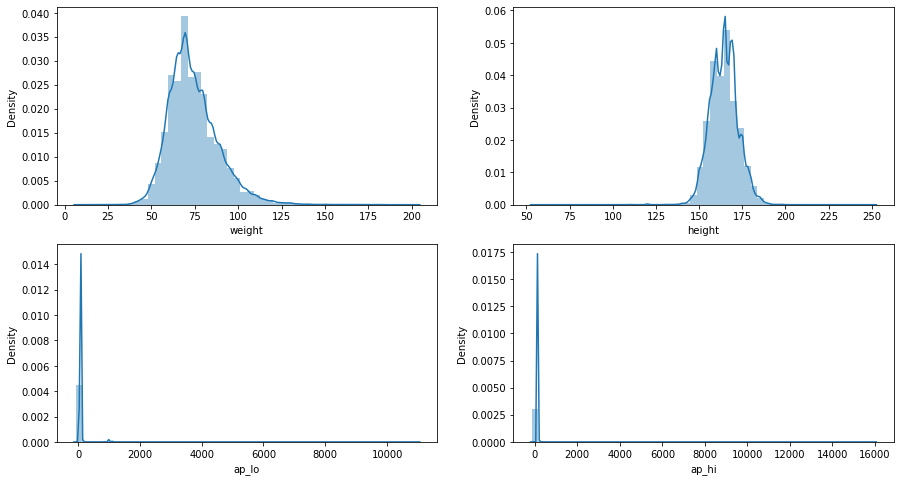

In [131]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.distplot(df2.weight)

plt.subplot(2,2,2)
sb.distplot(df2.height)

plt.subplot(2,2,3)
sb.distplot(df2.ap_lo)

plt.subplot(2,2,4)
sb.distplot(df2.ap_hi)

plt.show()

BOXPLOTS (Outliers)

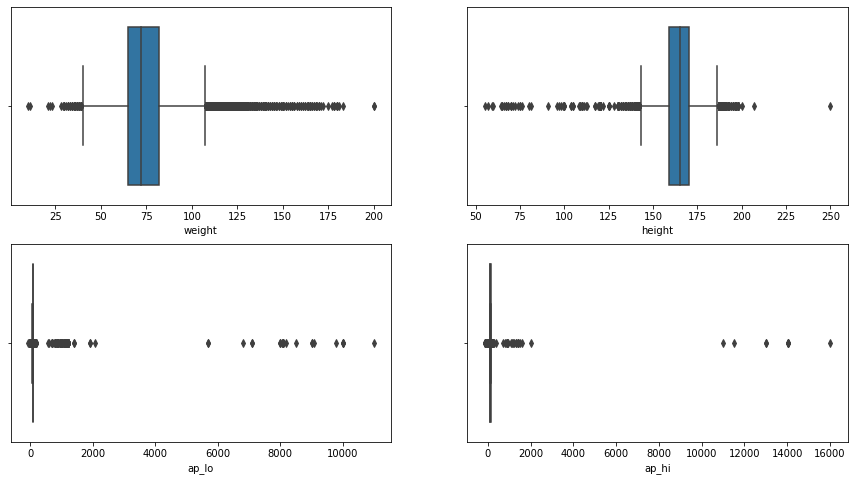

In [135]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.boxplot(df2.weight)

plt.subplot(2,2,2)
sb.boxplot(df2.height)

plt.subplot(2,2,3)
sb.boxplot(df2.ap_lo)

plt.subplot(2,2,4)
sb.boxplot(df2.ap_hi)

plt.show()

**Resume of numerical features analysis:**

1 - Note that the mode, average and median measures are very close to their values, this indicates that the variables are close to a normal distribution. **We probably won't need to normalize these variables.**

2 - There is a problem with the features ap_lo and ap_hi when observing kurtose, skewness, amplitude, min and max values, and std, as they are values that are very out of normal. **This can indicate bad values in these variables.**

3 - In the weight and height features, abnormal kurtosis and skewness measurements are also observed. **It can also indicate bad values.**

4 - In all variables a **high volume of Outliers** was observed. Depending on the model to be used, we may have problems.

### 2.0.1.3 - Categorical Features Description

**Table Frequency**

**- age feature**

In [143]:
df2['age_year'] = df2['age'].apply(lambda x : x // 365)

age = {'Age': df2['age_year'].unique(),
       'Frequency': df2['age_year'].value_counts(),
       'Relative_Frequency': round(df2['age_year'].value_counts() / df2['age_year'].value_counts().sum() * 100,2),}


age_frequency_table = pd.DataFrame(age, columns=['Age','Frequency','Relative_Frequency'])

age_frequency_table

,Age,Frequency,Relative_Frequency
55,50,3927,5.61
53,55,3868,5.53
57,51,3686,5.27
56,48,3607,5.15
54,47,3605,5.15
59,60,3576,5.11
49,61,3417,4.88
58,54,3409,4.87
51,40,3368,4.81
52,39,3279,4.68


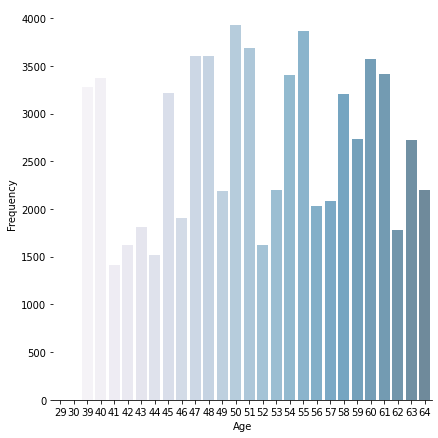

In [146]:
g = sb.catplot(
    data=df2, kind="bar",
    x=df2.age_year.unique(), y=df2.age_year.value_counts(), palette="PuBu", alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Age', "Frequency");

**- gender feature** (1 = Women . 2 = Men)

In [149]:
gender = {'Gender': df2['gender'].unique(),
          'Frequency': df2['gender'].value_counts(),
          'Relative_Frequency': round(df2['gender'].value_counts() / df2['gender'].value_counts().sum() * 100,2),}


gender_frequency_table = pd.DataFrame(gender, columns=['Gender','Frequency','Relative_Frequency'])

gender_frequency_table

,Gender,Frequency,Relative_Frequency
1,2,45530,65.04
2,1,24470,34.96


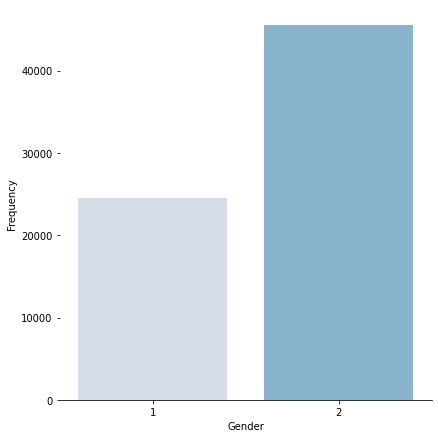

In [148]:
g = sb.catplot(data=df2, kind='bar', x=df2.gender.unique(), y=df2.gender.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Gender','Frequency');

**- cholesterol feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [151]:
cholesterol = {'Cholesterol': df2['cholesterol'].unique(),
               'Frequency': df2['cholesterol'].value_counts(),
               'Relative_Frequency': round(df2['cholesterol'].value_counts() / df2['cholesterol'].value_counts().sum() * 100,2),}


cholesterol_frequency_table = pd.DataFrame(cholesterol, columns=['Cholesterol','Frequency','Relative_Frequency'])

cholesterol_frequency_table

,Cholesterol,Frequency,Relative_Frequency
1,1,52385,74.84
2,3,9549,13.64
3,2,8066,11.52


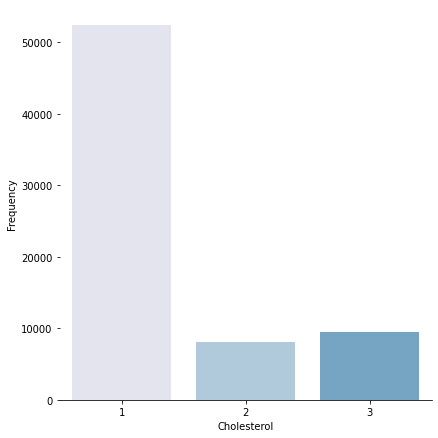

In [152]:
g = sb.catplot(data=df2, kind='bar', x=df2.cholesterol.unique(), y=df2.cholesterol.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cholesterol','Frequency');

**- gluc feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [153]:
gluc = {'Glucose': df2['gluc'].unique(),
               'Frequency': df2['gluc'].value_counts(),
               'Relative_Frequency': round(df2['gluc'].value_counts() / df2['gluc'].value_counts().sum() * 100,2),}


gluc_frequency_table = pd.DataFrame(gluc, columns=['Glucose','Frequency','Relative_Frequency'])

gluc_frequency_table

,Glucose,Frequency,Relative_Frequency
1,1,59479,84.97
3,2,5331,7.62
2,3,5190,7.41


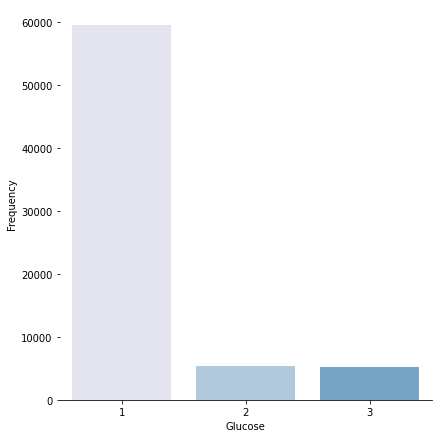

In [154]:
g = sb.catplot(data=df2, kind='bar', x=df2.gluc.unique(), y=df2.gluc.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Glucose','Frequency');

**- smoke feature** (0 = no smoke, 1 = smoke)

In [155]:
smoke = {'Smoke': df2['smoke'].unique(),
               'Frequency': df2['smoke'].value_counts(),
               'Relative_Frequency': round(df2['smoke'].value_counts() / df2['smoke'].value_counts().sum() * 100,2),}


smoke_frequency_table = pd.DataFrame(smoke, columns=['Smoke','Frequency','Relative_Frequency'])

smoke_frequency_table

,Smoke,Frequency,Relative_Frequency
0,0,63831,91.19
1,1,6169,8.81


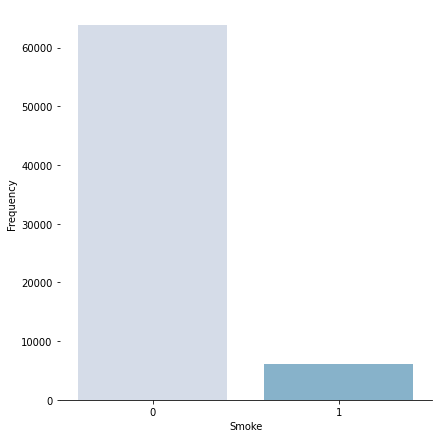

In [156]:
g = sb.catplot(data=df2, kind='bar', x=df2.smoke.unique(), y=df2.smoke.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Smoke','Frequency');

**- alco feature** (0 = no alcohol, 1 = alcohol)

In [158]:
alco = {'Alcohol': df2['alco'].unique(),
               'Frequency': df2['alco'].value_counts(),
               'Relative_Frequency': round(df2['alco'].value_counts() / df2['alco'].value_counts().sum() * 100,2),}


alco_frequency_table = pd.DataFrame(alco, columns=['Alcohol','Frequency','Relative_Frequency'])

alco_frequency_table

,Alcohol,Frequency,Relative_Frequency
0,0,66236,94.62
1,1,3764,5.38


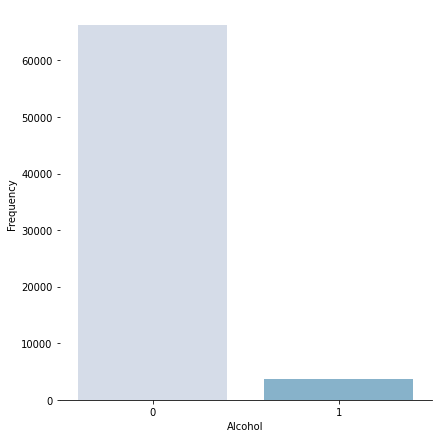

In [159]:
g = sb.catplot(data=df2, kind='bar', x=df2.alco.unique(), y=df2.alco.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Alcohol','Frequency');

**- active feature** (0 = no active, 1 = active)

In [161]:
active = {'Active': df2['active'].unique(),
               'Frequency': df2['active'].value_counts(),
               'Relative_Frequency': round(df2['active'].value_counts() / df2['active'].value_counts().sum() * 100,2),}


active_frequency_table = pd.DataFrame(active, columns=['Active','Frequency','Relative_Frequency'])

active_frequency_table

,Active,Frequency,Relative_Frequency
1,1,56261,80.37
0,0,13739,19.63


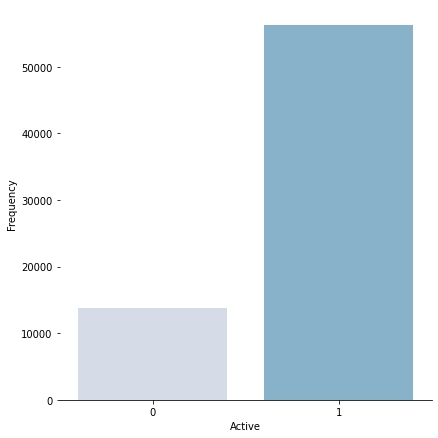

In [162]:
g = sb.catplot(data=df2, kind='bar', x=df2.active.unique(), y=df2.active.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Active','Frequency');

**- cardio feature** (0 = no diesease, 1 = diesease)

In [163]:
cardio = {'Cardio': df2['cardio'].unique(),
               'Frequency': df2['cardio'].value_counts(),
               'Relative_Frequency': round(df2['cardio'].value_counts() / df2['cardio'].value_counts().sum() * 100,2),}


cardio_frequency_table = pd.DataFrame(cardio, columns=['Cardio','Frequency','Relative_Frequency'])

cardio_frequency_table

,Cardio,Frequency,Relative_Frequency
0,0,35021,50.03
1,1,34979,49.97


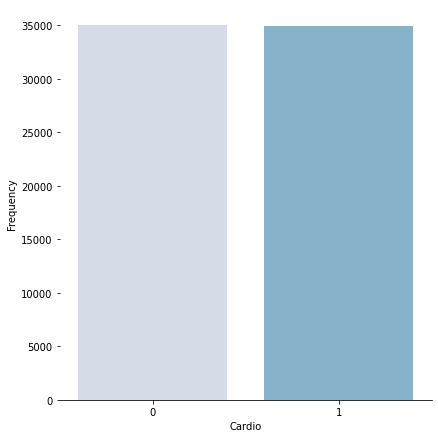

In [164]:
g = sb.catplot(data=df2, kind='bar', x=df2.cardio.unique(), y=df2.cardio.value_counts(), palette="PuBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cardio','Frequency');

**Resume of categorical features analysis:**

1 - **cardio** feature:
    - This is the TARGET feature. It's not need to be balanced with SMOTE or NearMiss techniques.

2 -  **active, alco, smoke, gender** features:
    - All are subjective features, there is no predefined label classes.
    - I am assuming the values: 0 = no active, 1 = active
                                0 = no alcohol, 1 = alcohol
                                0 = no smoke, 1 = smoke
                                1 = Women . 2 = Men
    
3 - **gluco,cholesterol** features:
    - Based on laboratory medical examinations.
    - According to [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset), the classes were defined as: 1 =  normal, 2 = above normal, 3 = well above normal

4 - **gender** feature:
    - There is no predefined label classes.
    - I am assuming the values: 

5 - **age** feature:
    - Describes ages in days. 
    - Must be changed for years

### 2.0.1.4 - Hypothesis Mind Map

### 2.0.1.5 - Creation of Hypotheses